In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torchvision

# Define device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# Hyperparameters
batch_size = 64
lr = 0.0002
latent_dim = 100
image_dim = 28 * 28  # FashionMNIST images are grayscale and 28x28
epochs = 30

# Transformation to normalize the images
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load FashionMNIST dataset
fashion_mnist_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
data_loader = DataLoader(fashion_mnist_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
# Generator Network
class Generator(nn.Module):
    def __init__(self, latent_dim, output_dim):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim),
            nn.Tanh()  # Output range between -1 and 1 for images
        )

    def forward(self, x):
        return self.main(x)

In [ ]:
# Discriminator Network
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output probability of being real
        )

    def forward(self, x):
        return self.main(x)

In [ ]:
# Initialize Generator, Discriminator, and Optimizers
generator = Generator(latent_dim, image_dim)
discriminator = Discriminator(image_dim)
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

# Loss function
criterion = nn.BCELoss()

In [ ]:
# Training Loop
for epoch in range(epochs):
    for i, real_images in enumerate(data_loader):
        real_images = real_images[0].view(-1, image_dim)
        batch_size = real_images.size(0)

        # Train Discriminator
        optimizer_D.zero_grad()

        # Real images
        real_labels = torch.ones(batch_size, 1)
        output_real = discriminator(real_images)
        loss_D_real = criterion(output_real, real_labels)

        # Fake images
        noise = torch.randn(batch_size, latent_dim)
        fake_images = generator(noise)
        fake_labels = torch.zeros(batch_size, 1)
        output_fake = discriminator(fake_images.detach())
        loss_D_fake = criterion(output_fake, fake_labels)

        # Total Discriminator loss
        loss_D = loss_D_real + loss_D_fake
        loss_D.backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()

        # Generator tries to fool the discriminator
        output = discriminator(fake_images)
        loss_G = criterion(output, real_labels)
        loss_G.backward()
        optimizer_G.step()

    # Print progress
    print(f"Epoch [{epoch+1}/{epochs}], Loss_D: {loss_D.item()}, Loss_G: {loss_G.item()}")

Epoch [1/30], Loss_D: 0.09703639894723892, Loss_G: 4.990449905395508
Epoch [2/30], Loss_D: 0.06381651759147644, Loss_G: 5.0817975997924805
Epoch [3/30], Loss_D: 0.11311623454093933, Loss_G: 5.796576499938965
Epoch [4/30], Loss_D: 0.26800256967544556, Loss_G: 6.250283241271973
Epoch [5/30], Loss_D: 0.2293691784143448, Loss_G: 4.963088035583496
Epoch [6/30], Loss_D: 0.30317598581314087, Loss_G: 3.0917680263519287
Epoch [7/30], Loss_D: 0.33871692419052124, Loss_G: 4.716243267059326
Epoch [8/30], Loss_D: 0.23418036103248596, Loss_G: 3.099081039428711
Epoch [9/30], Loss_D: 0.3262079954147339, Loss_G: 5.085091590881348
Epoch [10/30], Loss_D: 0.2643115222454071, Loss_G: 3.212904930114746
Epoch [11/30], Loss_D: 0.5340366363525391, Loss_G: 2.5896499156951904
Epoch [12/30], Loss_D: 0.5107372999191284, Loss_G: 2.7411954402923584
Epoch [13/30], Loss_D: 0.8230450749397278, Loss_G: 2.8979969024658203
Epoch [14/30], Loss_D: 0.5371294021606445, Loss_G: 3.276658296585083
Epoch [15/30], Loss_D: 0.539919

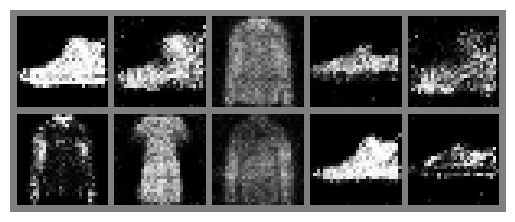

In [ ]:
# Generate sample images
num_samples = 10
with torch.no_grad():
    noise = torch.randn(num_samples, latent_dim).to(device)
    generated_images = generator(noise).view(-1, 1, 28, 28).cpu()

import matplotlib.pyplot as plt
import numpy as np

# Function to display images
def imshow(img):
    img = img / 2 + 0.5     # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

# Display generated images
imshow(torchvision.utils.make_grid(generated_images, nrow=5))

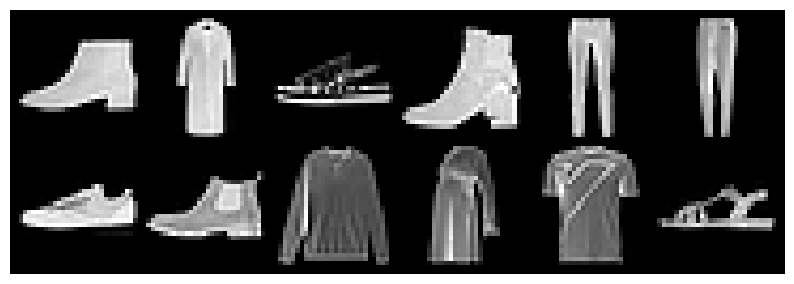

In [ ]:
from torchvision.utils import make_grid

def show_images(dataset, num_images=12):
    plt.figure(figsize=(10, 5))
    data_loader = torch.utils.data.DataLoader(dataset,
                  batch_size=num_images, shuffle=True)

    images, labels = next(iter(data_loader))
    grid = make_grid(images, nrow=6, normalize=True)
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.axis('off')
    plt.show()

# Display original images
show_images(fashion_mnist_dataset)

In [ ]:
import torch

x = torch.randn(3,2)
print(x)

tensor([[-1.4227, -0.1958],
        [ 1.6035,  0.1098],
        [-0.8174, -0.0432]])
